In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, scale, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [84]:
df_train_v1 = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/house_prices/train.csv')
df_test_v1 = pd.read_csv('~/Desktop/DSI-SF-5-Working/datasets/house_prices/test.csv')

In [85]:
df_train_v1.shape,df_test_v1.shape

((1460, 81), (1459, 80))

In [86]:
df_train_v1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [87]:
df_test_v1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [88]:
df_train_v1.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [89]:
#CHECK PRESENCE OF MISSING VALUES
miss_vls = pd.DataFrame(df_train_v1.isnull().sum(axis=0).sort_values(ascending=False), columns=['Count'])
miss_vls['Percent'] = miss_vls['Count'].apply(lambda x: '{:.2f}%'.format((float(x) / df_train_v1.shape[0]) * 100))
miss_vls[miss_vls.Count > 0]

Count Percent
PoolQC         1453  99.52%
MiscFeature    1406  96.30%
Alley          1369  93.77%
Fence          1179  80.75%
FireplaceQu     690  47.26%
LotFrontage     259  17.74%
GarageCond       81   5.55%
GarageType       81   5.55%
GarageYrBlt      81   5.55%
GarageFinish     81   5.55%
GarageQual       81   5.55%
BsmtExposure     38   2.60%
BsmtFinType2     38   2.60%
BsmtFinType1     37   2.53%
BsmtCond         37   2.53%
BsmtQual         37   2.53%
MasVnrArea        8   0.55%
MasVnrType        8   0.55%
Electrical        1   0.07%

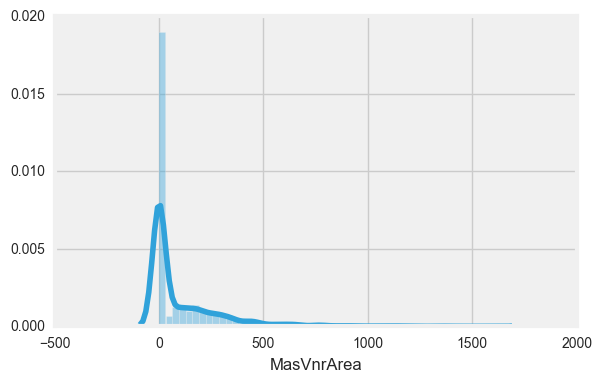

In [105]:
sns.distplot(df_train_v1[np.isfinite(df_train_v1.MasVnrArea)].MasVnrArea);

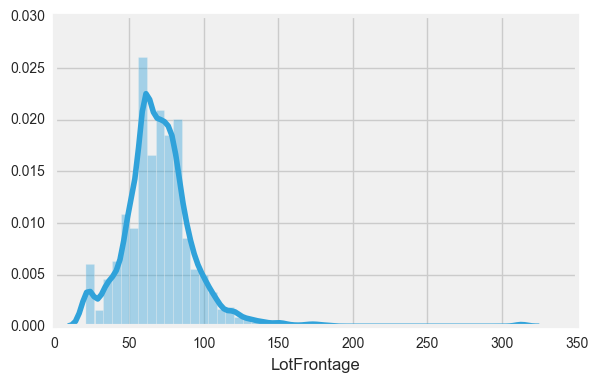

In [90]:
sns.distplot(df_train_v1[np.isfinite(df_train_v1.LotFrontage)].LotFrontage);

In [91]:
df_train_v1[np.isfinite(df_train_v1.LotFrontage)].LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [92]:
df_train_v1["LotFrontage"].fillna(df_train_v1["LotFrontage"].mean(), inplace=True)

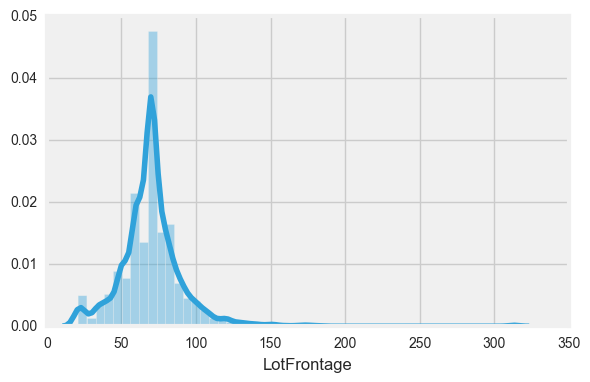

In [93]:
sns.distplot(df_train_v1.LotFrontage);

In [94]:
df_train_v1.LotFrontage.describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [95]:
#DESCRIBE DATA: TABLE SHOWS THAT THERE ARE HOUSES WITH ZERO VALUES OF CERTAIN VARIABLES WHICH PROBABLY REPRESENTS
#LACK OF CORRESPONDING FEATURE IN THE HOUSE
df_train_v1.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0        NaN   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0        NaN   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
Id                730.500000    1095.25    1460.0  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea               NaN        NaN    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.

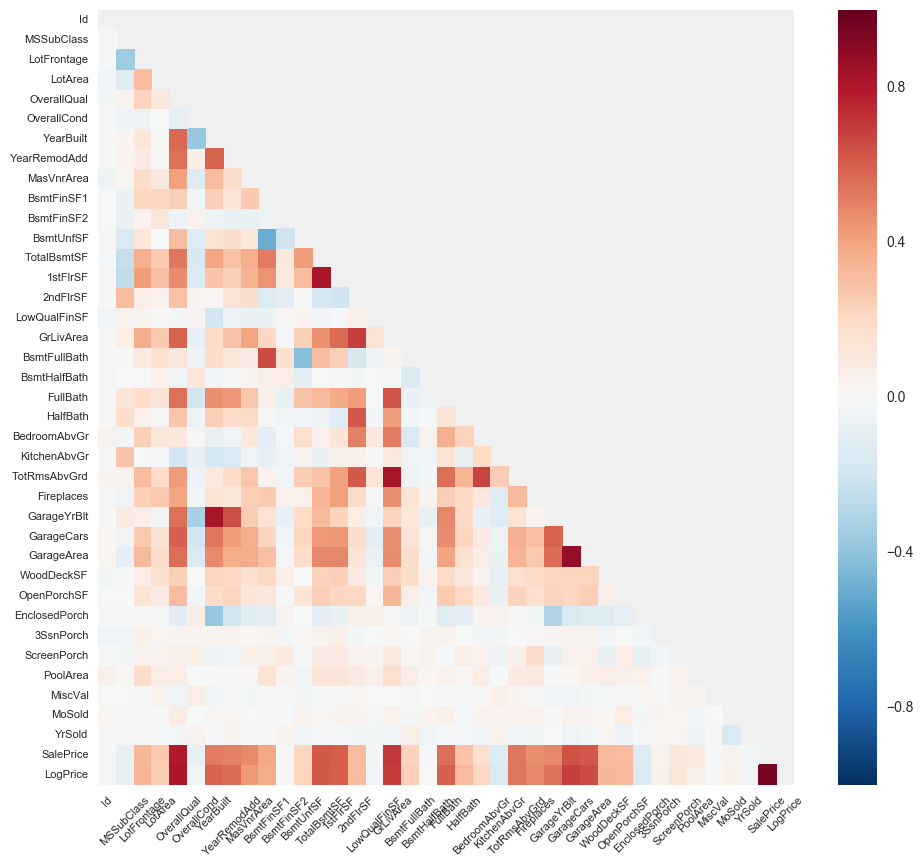

In [129]:
corrs = df_train_v1.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

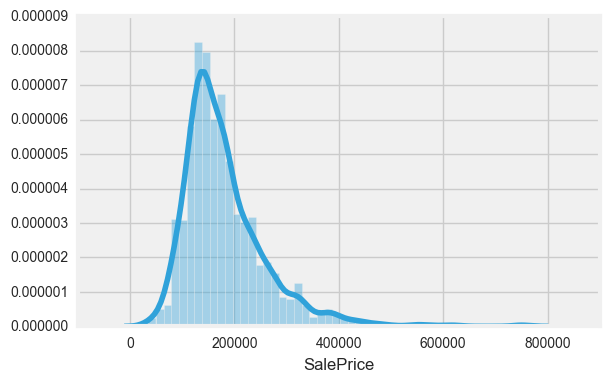

In [97]:
#CHECK DISTRIBUTION OF TARGET VARIABLE
sns.distplot(df_train_v1.SalePrice);

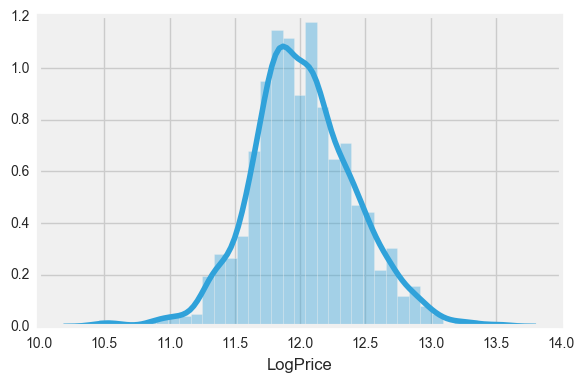

In [98]:
df_train_v1['LogPrice'] = np.log(df_train_v1['SalePrice'])
sns.distplot(df_train_v1['LogPrice']);

In [107]:
quant_cols1 = df_train_v1[['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','SalePrice','LogPrice']]

In [108]:
quant_cols2 = df_train_v1[['TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','SalePrice','LogPrice']]

In [109]:
quant_cols3 = df_train_v1[['WoodDeckSF','OpenPorchSF','PoolArea','MiscVal','SalePrice','LogPrice']]

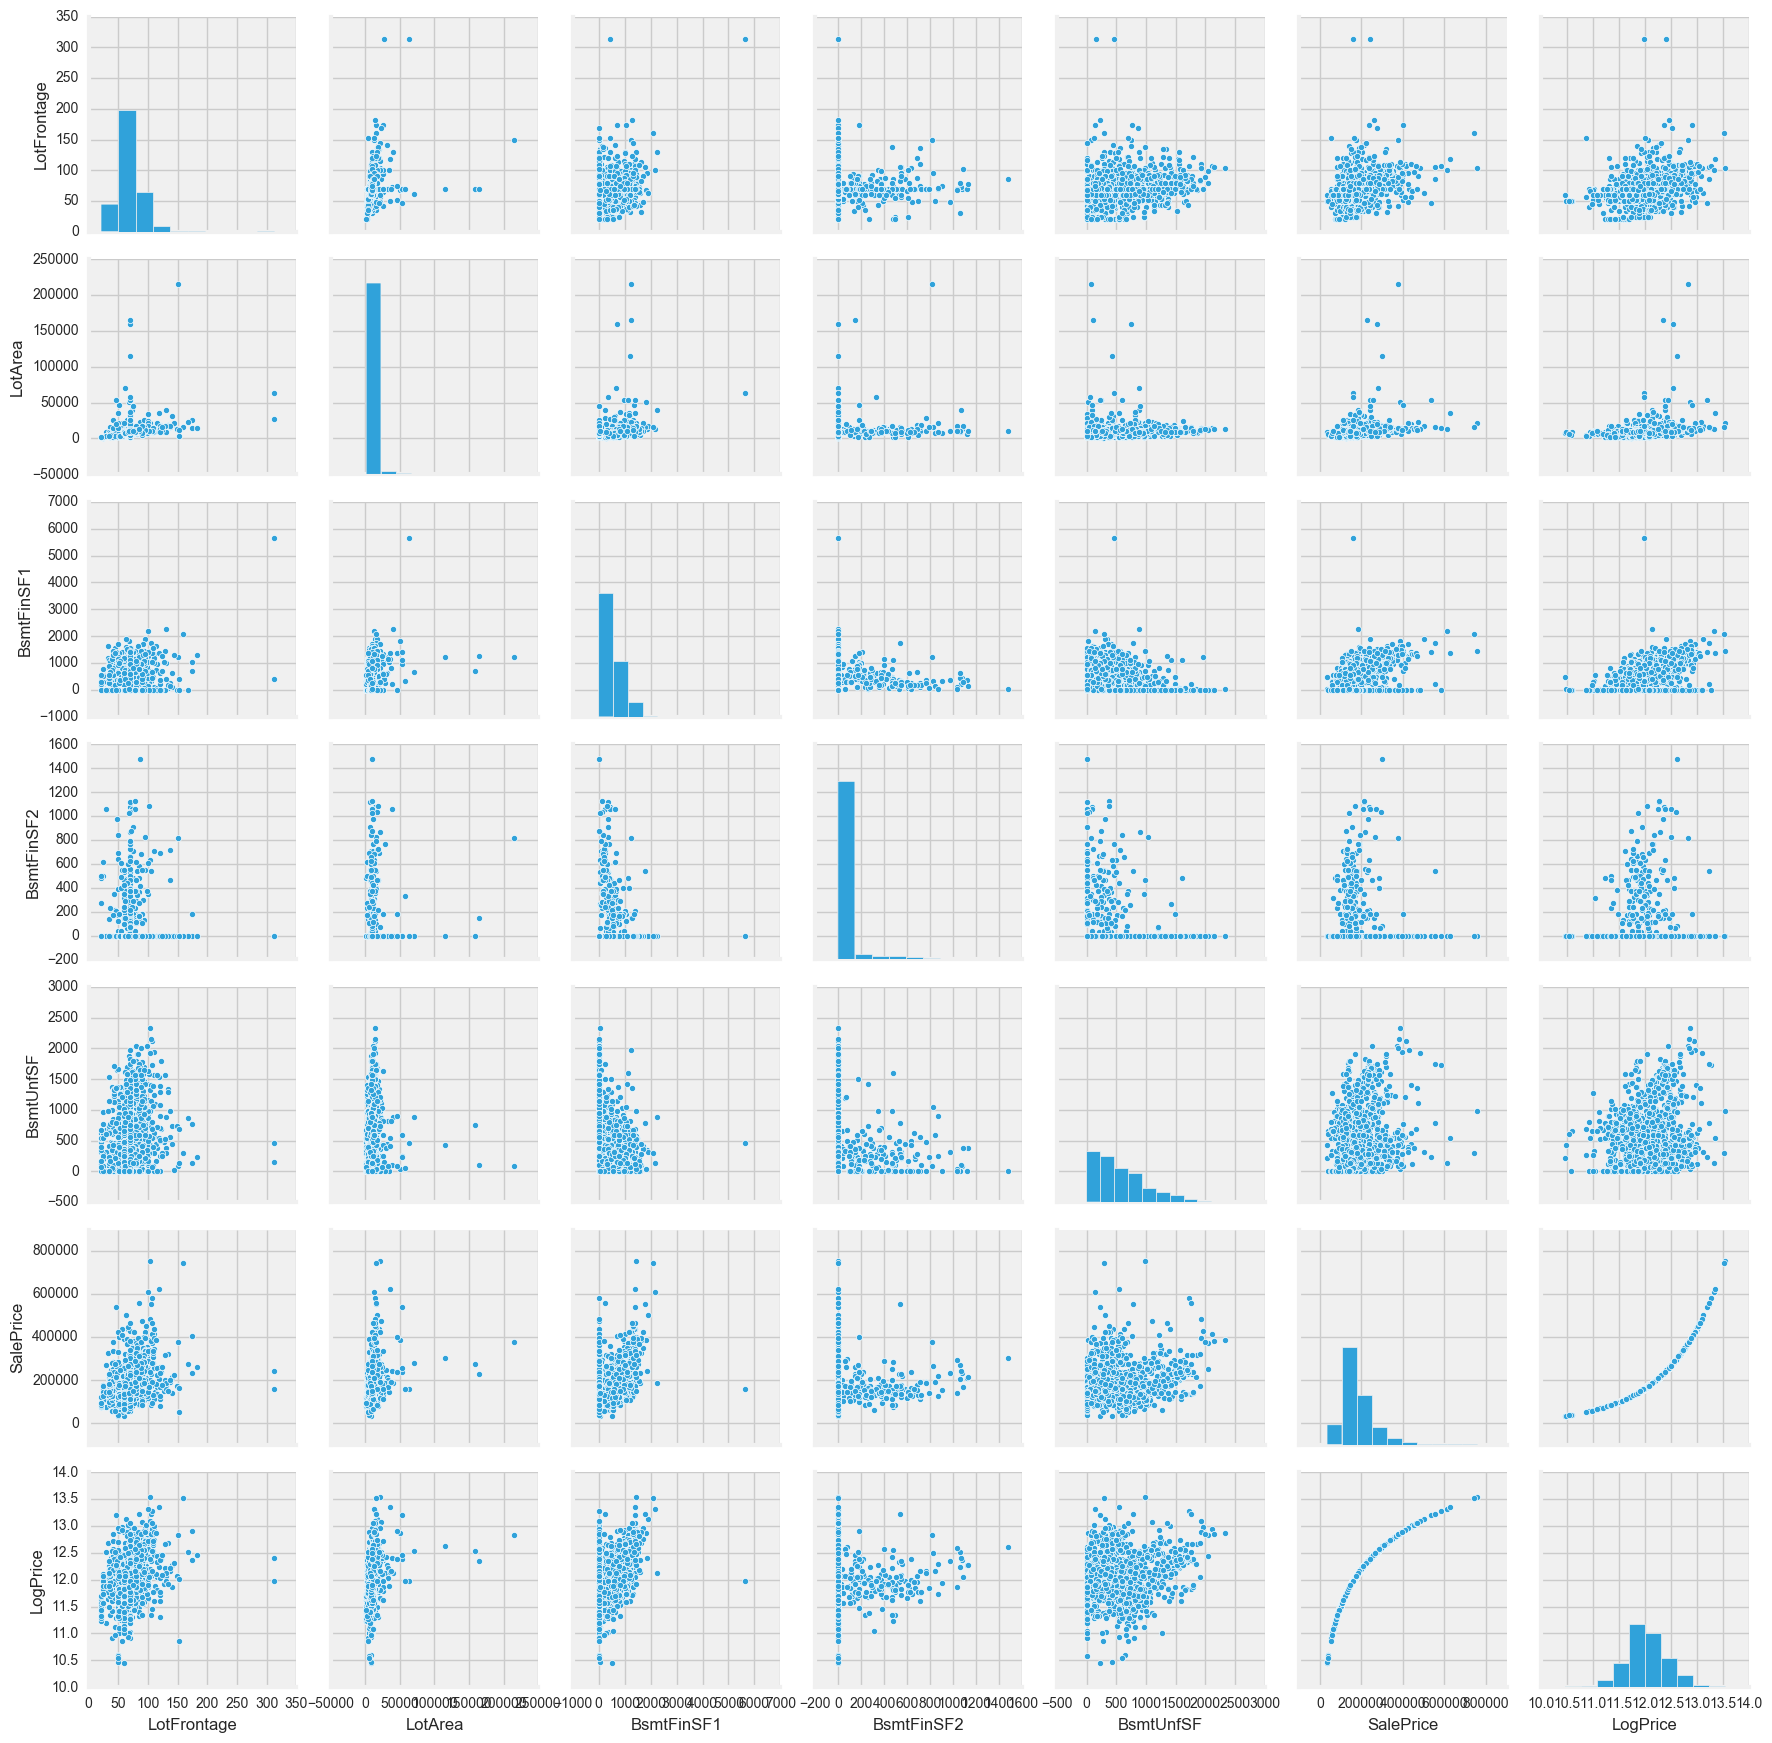

In [110]:
sns.pairplot(quant_cols1);

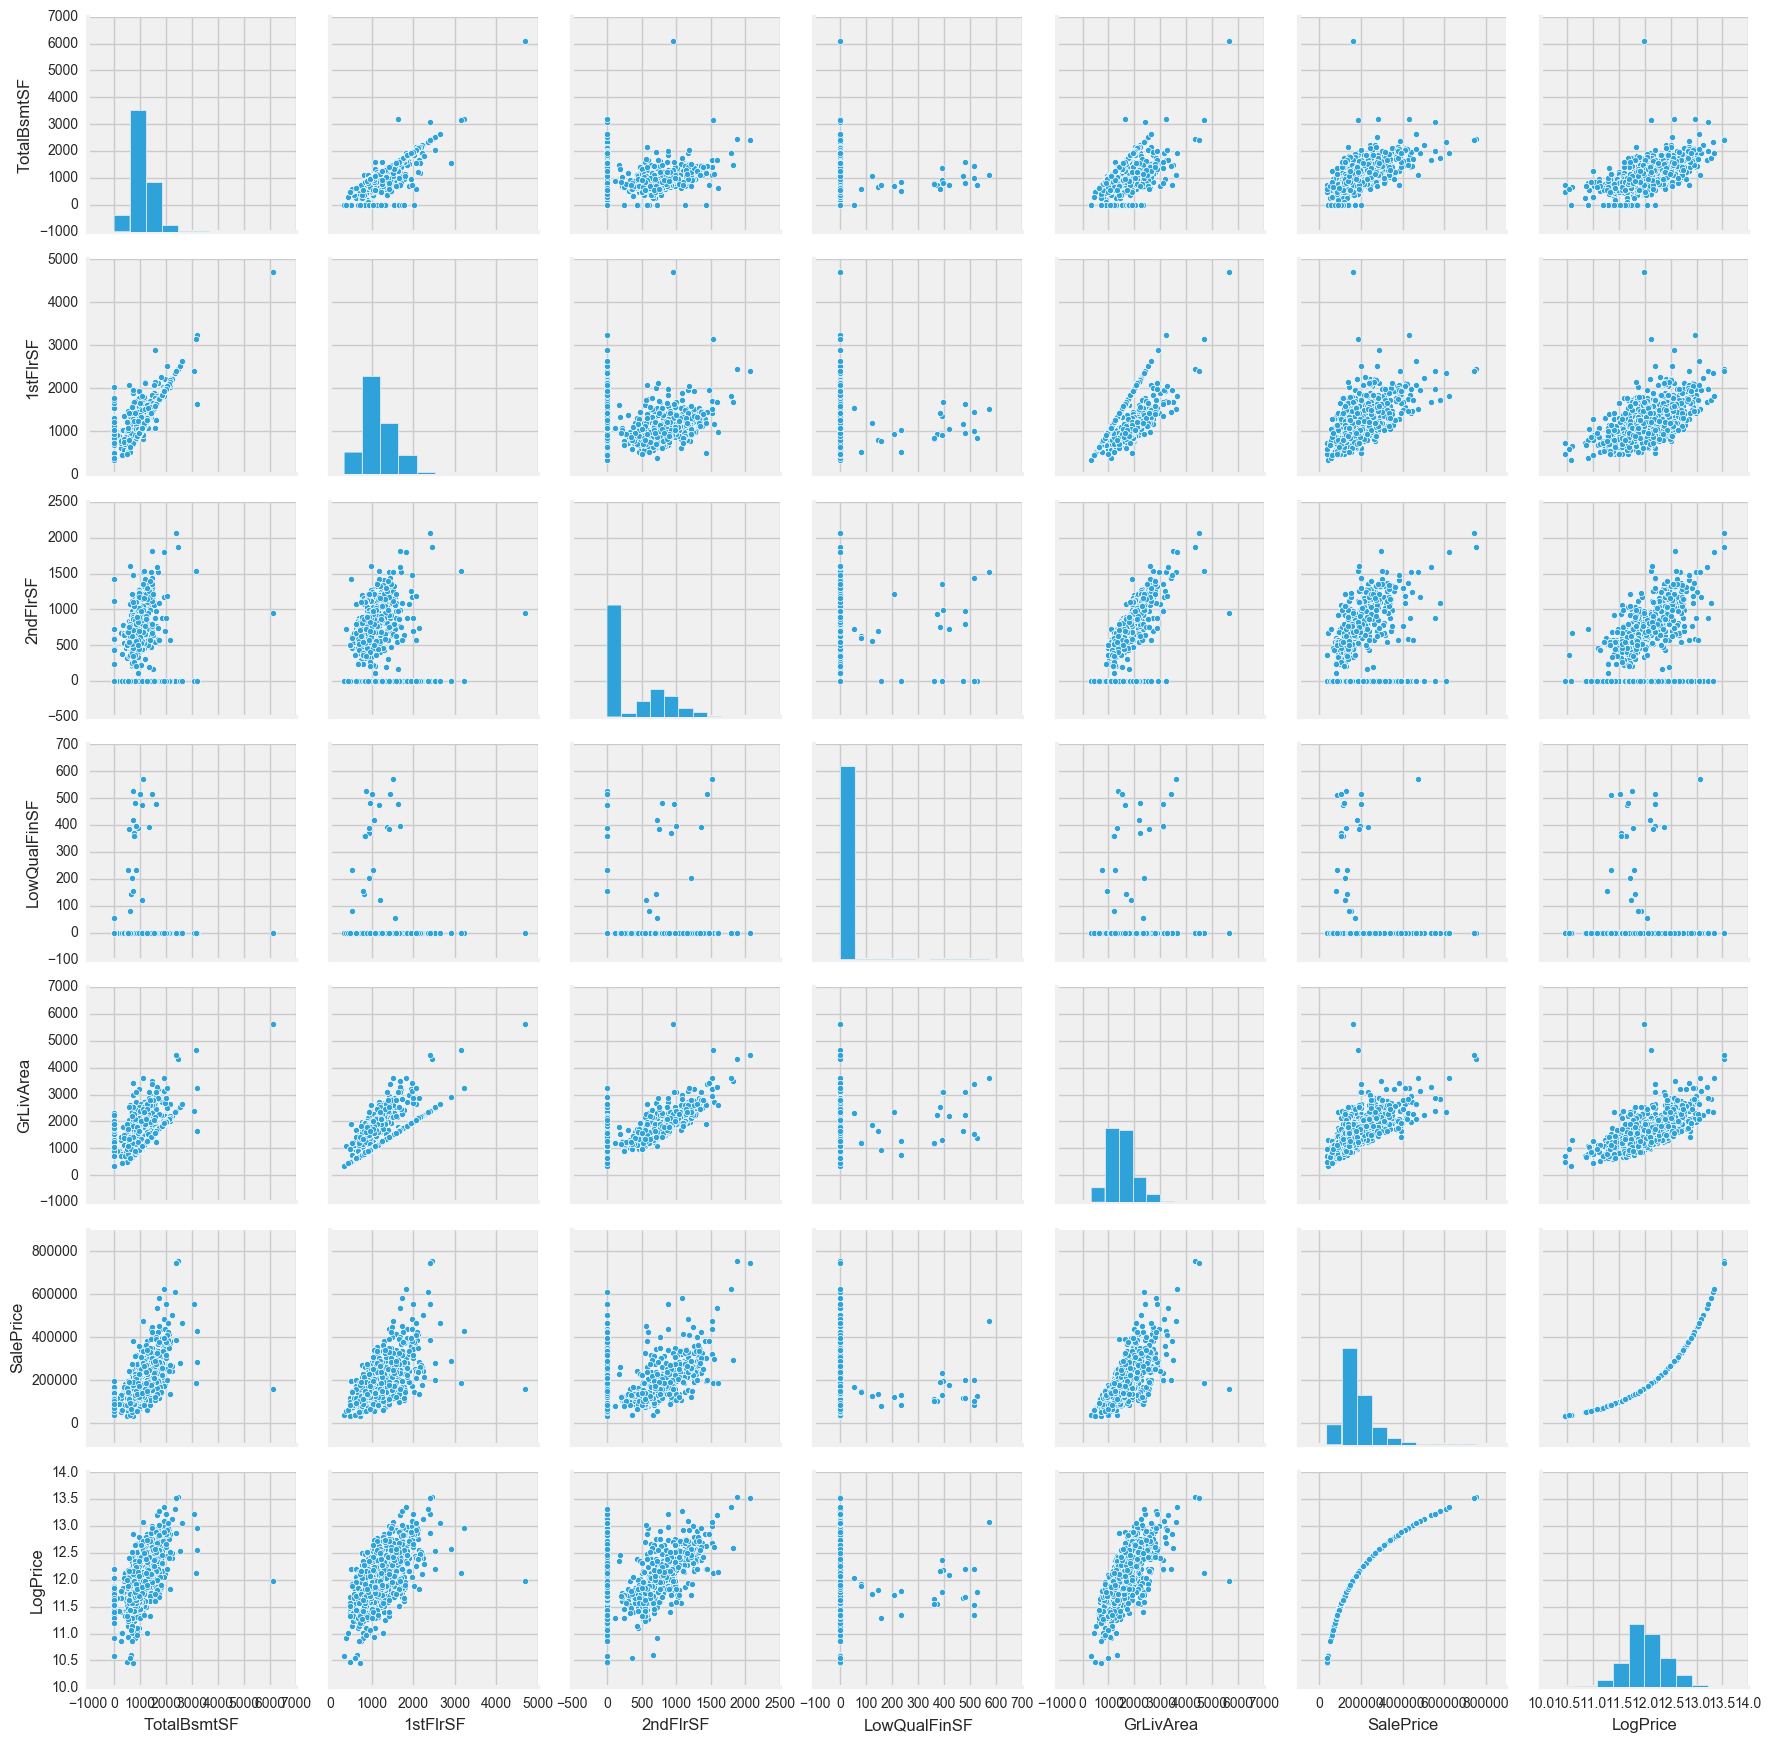

In [111]:
sns.pairplot(quant_cols2);

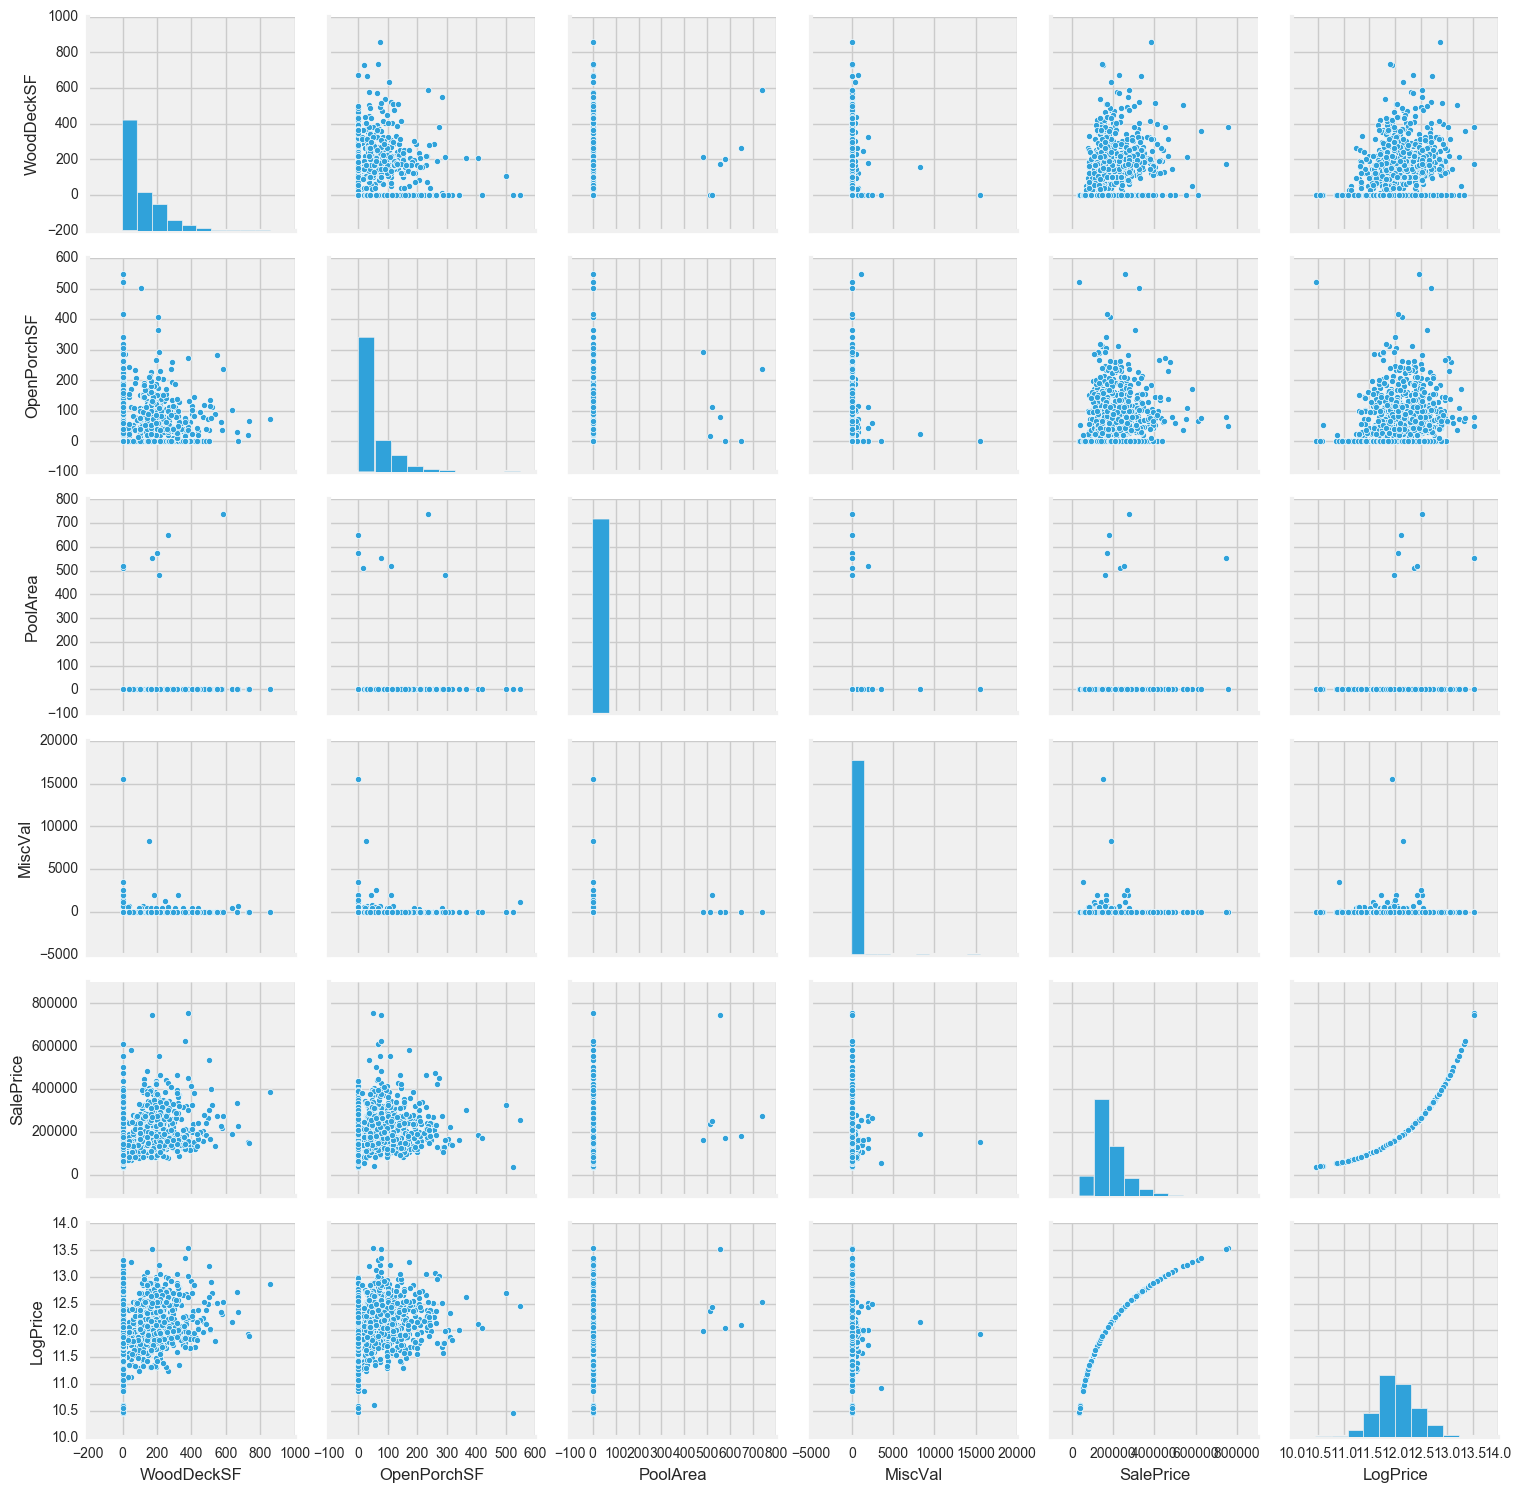

In [112]:
sns.pairplot(quant_cols3);

In [126]:
#CHECK PRESENCE OF ZERO VALUES
zero_vls = pd.DataFrame(df_train_v1.astype(bool).sum(axis=0).sort_values(ascending=True), columns=['Count'])
zero_vls['Percent'] = zero_vls['Count'].apply(lambda x: '{:.2f}%'.format((df_train_v1.shape[0] - float(x)) / df_train_v1.shape[0] * 100))
zero_vls['Count'] = df_train_v1.shape[0] - zero_vls['Count']
zero_vls[zero_vls.Count > 0]

Count Percent
PoolArea        1453  99.52%
3SsnPorch       1436  98.36%
LowQualFinSF    1434  98.22%
MiscVal         1408  96.44%
BsmtHalfBath    1378  94.38%
ScreenPorch     1344  92.05%
BsmtFinSF2      1293  88.56%
EnclosedPorch   1252  85.75%
HalfBath         913  62.53%
MasVnrArea       861  58.97%
BsmtFullBath     856  58.63%
2ndFlrSF         829  56.78%
WoodDeckSF       761  52.12%
Fireplaces       690  47.26%
OpenPorchSF      656  44.93%
BsmtFinSF1       467  31.99%
BsmtUnfSF        118   8.08%
GarageArea        81   5.55%
GarageCars        81   5.55%
TotalBsmtSF       37   2.53%
FullBath           9   0.62%
BedroomAbvGr       6   0.41%
KitchenAbvGr       1   0.07%

In [113]:
qualitative = df_train_v1[['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'BsmtQual', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr',
               'TotRmsAbvGrd','Fireplaces','CentralAir', 'Condition1', 'Condition2', 'Electrical', 'ExterCond', 
               'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation', 
               'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 
               'HeatingQC', 'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 
               'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 
               'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities', 'MSSubClass',
               'MoSold','YrSold','YearBuilt','YearRemodAdd']]
qual_cols = qualitative.columns.tolist()

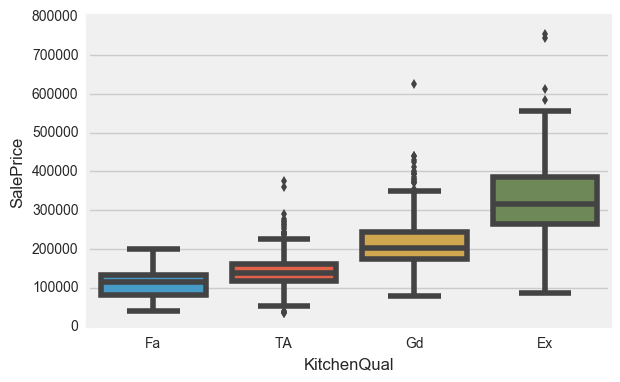

In [128]:
sns.boxplot(x=df_train_v1.KitchenQual,y=df_train_v1.SalePrice,order=['Fa','TA','Gd','Ex']);

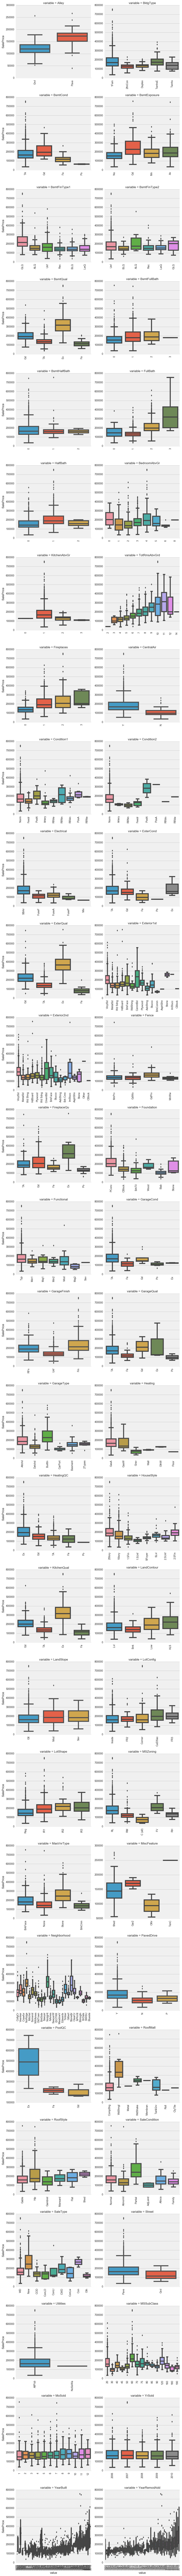

In [114]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_train_v1, id_vars=['SalePrice'], value_vars=qual_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

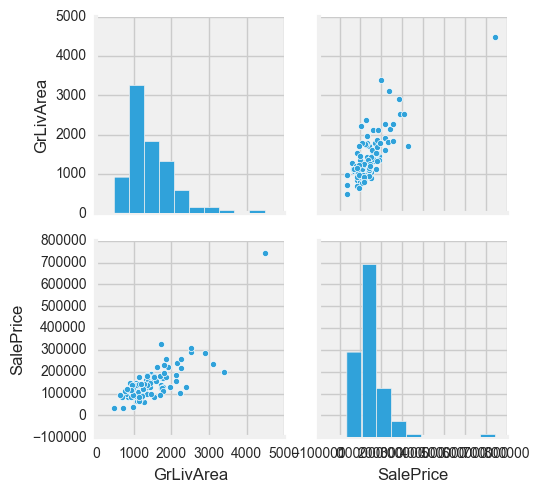

In [16]:
#IDENTIFY OUTLIERS
sns.pairplot(df_train_v1[df_train_v1.SaleCondition == 'Abnorml'], vars=["GrLivArea", "SalePrice"]);

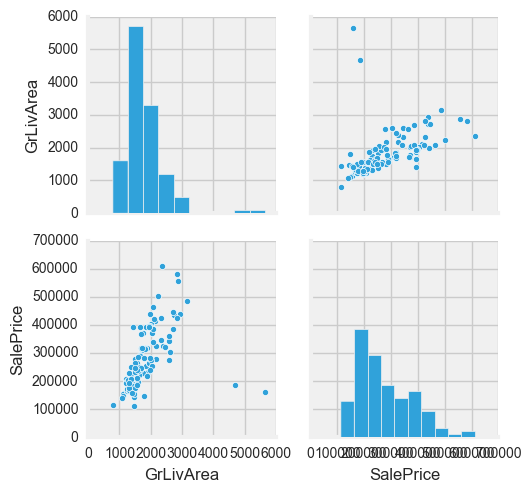

In [17]:
sns.pairplot(df_train_v1[df_train_v1.SaleCondition == 'Partial'], vars=["GrLivArea", "SalePrice"]);

In [18]:
df_train_v1 = df_train_v1[df_train_v1.GrLivArea < 4000]

In [19]:
df_train_v1 = df_train_v1.reset_index(drop = True)

In [20]:
df_train_v1.shape

(1456, 82)

In [10]:
#df_train_test = pd.concat([df_train_v1, df_test_v1], axis = 0, ignore_index= True)

In [52]:
#TAKEAWAYS FROM EDA:
# Target variable (SalePrice) exhibits non-normal distribution (skewed, with outliers having large price values)

### 1. Perform EDA and Data Cleaning 

- Clean the data 
- Develop and state clear hypothesis that you want to test 
- Create some initial visualizations on your portions of the data 

In [11]:
col_names = [u'MSSubClass', u'MSZoning', u'LotArea', u'LotFrontage',
       u'Street', u'LandContour', 
       u'LotConfig', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'Exterior1st', u'Exterior2nd',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', 
       u'Fireplaces', u'FireplaceQu', u'GarageType',
       u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual',
       u'GarageCond', u'PavedDrive',
       u'MiscVal', u'MoSold', u'YrSold', u'SaleType',
       u'SaleCondition', u'SalePrice']

df2 = df_train_test[col_names]

In [12]:
df2.LotFrontage = df2.LotFrontage.fillna(value = df2.LotFrontage.mean())

/Users/DanielCervoni/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
#feature engineering
df2 = df2.join(df2.groupby('Neighborhood')['SalePrice'].mean(), on="Neighborhood", rsuffix='_N')
df2['Age'] = df2.YrSold - df2.YearBuilt
df2 = df2.join(df2.groupby('Neighborhood')['Age'].mean(), on = 'Neighborhood', rsuffix = '_N')

In [14]:
df2.MSSubClass = df2.MSSubClass.astype(str)

In [15]:
# corrs = df_train_v2.corrwith(df_test_v2)

# #Set the default matplotlib figure size:
# fig, ax = plt.subplots(figsize=(10,10))

# #Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(corrs, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# #Plot the heatmap with seaborn.
# #Assign the matplotlib axis the function returns. This will let us resize the labels.
# ax = sns.heatmap(corrs, mask=mask)

# #Resize the labels.
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=90)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

# #If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
# plt.show()

In [16]:
dummies_df = pd.get_dummies(df2, dummy_na = True)

In [17]:
#feature engineering
dummies_df['Garage'] = np.where(((dummies_df.GarageCars > 0) | (dummies_df.GarageArea > 0)), 1, 0)
dummies_df['Basement'] = dummies_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dummies_df['YrsSinceRemod'] = dummies_df.YrSold - dummies_df.YearRemodAdd
dummies_df['RmsAbvGrd^2'] = (dummies_df['TotRmsAbvGrd'])**2
dummies_df['YrbltvsQual'] = dummies_df['YearBuilt'] * dummies_df['OverallQual']
dummies_df['BedstoBaths'] = np.where(dummies_df['BedroomAbvGr'] > 0, dummies_df['FullBath'] / dummies_df['BedroomAbvGr'], 0)
dummies_df['GrLivArbyRooms'] = dummies_df['GrLivArea'] / dummies_df['TotRmsAbvGrd']
dummies_df['GrLivArxQual'] = dummies_df['GrLivArea'] * dummies_df['OverallQual']
dummies_df['QualxCond'] = dummies_df['OverallQual'] * dummies_df['OverallCond']

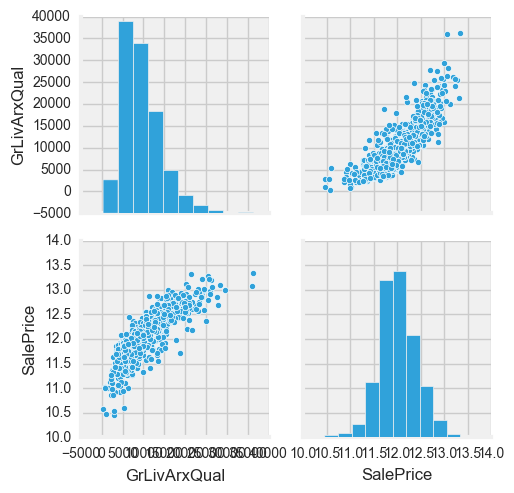

In [18]:
sns.pairplot(dummies_df.iloc[0:1456,:], vars = ['GrLivArxQual', 'SalePrice'])

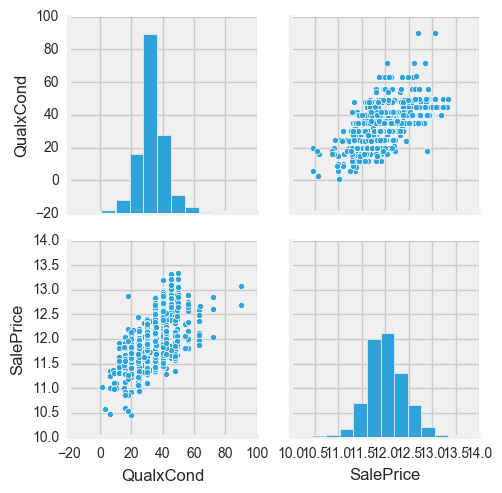

In [19]:
sns.pairplot(dummies_df.iloc[0:1456,:], vars = ['QualxCond', 'SalePrice'])

In [20]:
dummies_df.SalePrice.fillna(value = 0, inplace = True)

In [21]:
dummies_df[dummies_df['SalePrice'] != 0].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455],
           dtype='int64', length=1456)

In [22]:
dummies_df.fillna(value = 0, inplace = True)

In [23]:
columns_to_log_tran = ['LotArea', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MiscVal']

for col in columns_to_log_tran:
    dummies_df[col] = np.log1p(dummies_df[col])

In [24]:
dummy_df_cols = dummies_df.columns.tolist()
cols_not_to_tran = ['LotArea', 'LotFrontage', 'GrLivArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MiscVal', 'SalePrice']

mms = MinMaxScaler()

for col in dummy_df_cols:
    if col in cols_not_to_tran:
        pass
    else:
        dummies_df[col] = mms.fit_transform(dummies_df[col])

/Users/DanielCervoni/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/DanielCervoni/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/DanielCervoni/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Resha

In [25]:
df_train_v2 = dummies_df.iloc[0:1456, :]
df_test_v2 = dummies_df.iloc[1456:, :]

In [26]:
y = df_train_v2.SalePrice
df_X_train = df_train_v2.drop('SalePrice', axis = 1)

## Modeling

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_X_train, y, test_size = .25, random_state = 3)

### Linear Regression

In [28]:
lr = LinearRegression()

#fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X1_train, y1_train)

#given our model and our fit, predict y_values using x_test set
yr_hat = lr.predict(X1_test)
#lr.score(X1_test, y1_test)

#cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, df_X_train, y, cv = 5, scoring= 'r2')

print lr_cv
print lr_cv.mean()

[ -5.09667117e+19  -1.17131739e+21  -2.29559249e+18  -4.44799666e+21
  -3.87458264e+19]
-1.14226443514e+21


### Ridge Regression

In [29]:
#parameters = {'alpha': [.001,.01,.1,1, 10, 100, 1000]}

#gs_ridge = GridSearchCV(ridge, param_grid = parameters, cv = 5, verbose = 1) #scoring default is r^2 for ridge regression

# gs_ridge_fit = gs_ridge.fit(X1_train, y1_train)
# y_hat1 = gs_ridge.predict(X1_test)
#five_fold_cv = cross_val_score(gscv, X, y=y, scoring= 'r2', cv = 5) GridSearchCV already does CV
#print gs_ridge.best_score_, gs_ridge.best_params_, gs_ridge.scoring

In [30]:
ridge = Ridge(alpha = 1)

ridge.fit(X1_train, y1_train)

cv_ridge = cross_val_score(ridge, df_X_train, y, scoring = 'neg_mean_squared_error', cv = 5)
print cv_ridge
print cv_ridge.mean()

[-0.01254364 -0.01486831 -0.01759741 -0.01225023 -0.01370607]
-0.0141931328473


In [31]:
X_test = df_test_v2.drop('SalePrice', axis = 1)

In [32]:
predictions = ridge.predict(X_test)
sales_predictions = np.exp(predictions)
sales_predictions

array([ 122370.343144  ,  158027.30648119,  179385.9071438 , ...,
        155796.78405687,  113270.090835  ,  210399.73769564])

In [33]:
sales_predictions_df_ridge = pd.DataFrame(sales_predictions, columns=['SalePrice'])

In [34]:
sales_predictions_df_ridge['Id'] = np.arange(1461, 2920)

In [35]:
sales_predictions_df_cols_ridge = sales_predictions_df_ridge.columns.tolist()
sales_predictions_df_cols_ridge = [sales_predictions_df_cols_ridge[1]] + [sales_predictions_df_cols_ridge[0]]
sales_predictions_df_ridge = sales_predictions_df_ridge[sales_predictions_df_cols_ridge]
sales_predictions_df_ridge.head()

Id      SalePrice
0  1461  122144.717361
1  1462  162022.970778
2  1463  182828.951283
3  1464  202880.060436
4  1465  200791.843229

In [330]:
sales_predictions_df_ridge.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_ridgev3.csv')

### lasso

In [33]:
lasso = Lasso(alpha = .001)

# parameters = {'alpha': [.001,.01,.1,1]}

# gs_lasso = GridSearchCV(lasso, param_grid = parameters, cv = 5, verbose = 1) #scoring default is r^2 for lasso regression
# gs_lasso_fit = gs_lasso.fit(X1_train, y1_train)

# print gs_lasso.best_score_, gs_lasso.best_params_



lasso.fit(X1_train, y1_train)

cv_lasso = cross_val_score(lasso, df_X_train, y, cv = 5, scoring = 'neg_mean_squared_error')

print cv_lasso.mean()

-0.0133376951988


In [34]:
lasso_predictions = lasso.predict(X_test)
lasso_sales_predictions = np.exp(lasso_predictions)
lasso_sales_predictions

array([ 115572.71580059,  152241.52147437,  177708.94273678, ...,
        157620.81379241,  116003.41352201,  218858.96759291])

In [38]:
sales_predictions_df_lasso = pd.DataFrame(lasso_sales_predictions, columns=['SalePrice'])

In [39]:
sales_predictions_df_lasso['Id'] = np.arange(1461, 2920)

In [40]:
sales_predictions_df_cols_lasso = sales_predictions_df_lasso.columns.tolist()
sales_predictions_df_cols_lasso = [sales_predictions_df_cols_lasso[1]] + [sales_predictions_df_cols_lasso[0]]
sales_predictions_df_lasso = sales_predictions_df_lasso[sales_predictions_df_cols_lasso]
sales_predictions_df_lasso.head()

Id      SalePrice
0  1461  114627.480899
1  1462  156349.241342
2  1463  182128.330413
3  1464  202969.781184
4  1465  192990.560144

In [336]:
sales_predictions_df_lasso.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_lassov1.csv')

### Elastic Net

In [35]:
from sklearn.linear_model import ElasticNet

In [36]:
eln = ElasticNet(alpha = .001, l1_ratio = .25)

# parameters = {'alpha': [.001,.01,.1,1], 'l1_ratio': [.25, .50, .75],}
# gs_eln = GridSearchCV(eln, param_grid = parameters, cv = 5, scoring = 'neg_mean_squared_error', verbose = 1) #scoring default is r^2 for lasso regression
# gs_eln_fit = gs_eln.fit(X1_train, y1_train)
#print gs_eln.best_score_, gs_eln.best_params_

eln.fit(X1_train, y1_train)

cv_eln = cross_val_score(eln, df_X_train, y, cv = 5, scoring = 'neg_mean_squared_error')

print cv_eln.mean()

-0.0128296264219


In [37]:
eln_predictions = eln.predict(X_test)
eln_sales_predictions = np.exp(eln_predictions)
eln_sales_predictions

array([ 117765.19230393,  155158.44448155,  176815.63501491, ...,
        156663.92230706,  114788.59227345,  213505.08695173])

In [44]:
sales_predictions_df_eln = pd.DataFrame(eln_sales_predictions, columns=['SalePrice'])

In [45]:
sales_predictions_df_eln['Id'] = np.arange(1461, 2920)

In [46]:
sales_predictions_df_cols_eln = sales_predictions_df_eln.columns.tolist()
sales_predictions_df_cols_eln = [sales_predictions_df_cols_eln[1]] + [sales_predictions_df_cols_eln[0]]
sales_predictions_df_eln = sales_predictions_df_eln[sales_predictions_df_cols_eln]
sales_predictions_df_eln.head()

Id      SalePrice
0  1461  117800.123428
1  1462  159153.177024
2  1463  180482.123050
3  1464  200775.655201
4  1465  200319.657919

In [67]:
sales_predictions_df_eln.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_elnv1.csv')

## SVR

In [38]:
from sklearn.svm import SVR

In [40]:
svr = SVR(C = 25, epsilon = 0.1, kernel = 'rbf', gamma = 'auto')

# parameters = {'C': [25, 50], 'epsilon': [0.1], 'kernel': ['rbf', 'poly']}
# gs_svr = GridSearchCV(svr, param_grid = parameters, cv = 5, scoring = 'r2' )
# gs_svr_fit = gs_svr.fit(X1_train, y1_train)
# print("Best: %f using %s" % (gs_svr_fit.best_score_, gs_svr_fit.best_params_))

svr.fit(X1_train, y1_train)

cv_svr = cross_val_score(svr, df_X_train, y, scoring = 'neg_mean_squared_error', cv = 8)

print cv_svr.mean()

-0.0148628348521


In [41]:
svr_predictions = svr.predict(X_test)
svr_sales_predictions = np.exp(svr_predictions)
svr_sales_predictions

array([ 124913.65080708,  165784.0590892 ,  181356.75561055, ...,
        155342.71034899,  105472.65355698,  205580.91274871])

In [42]:
sales_predictions_df_svr = pd.DataFrame(svr_sales_predictions, columns=['SalePrice'])

In [43]:
sales_predictions_df_svr['Id'] = np.arange(1461, 2920)

In [44]:
sales_predictions_df_cols_svr = sales_predictions_df_svr.columns.tolist()
sales_predictions_df_cols_svr = [sales_predictions_df_cols_svr[1]] + [sales_predictions_df_cols_svr[0]]
sales_predictions_df_svr = sales_predictions_df_svr[sales_predictions_df_cols_svr]
sales_predictions_df_svr.head()

Id      SalePrice
0  1461  124913.650807
1  1462  165784.059089
2  1463  181356.755611
3  1464  204889.506742
4  1465  189855.165385

In [98]:
sales_predictions_df_svr.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_svr.csv')

### Random Forest & Feature Importance

In [45]:
rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')


# parameters = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5], 'min_samples_leaf': [5, 10]}
# gs_rfr = GridSearchCV(rfr, param_grid = parameters, cv = 5, scoring = 'r2' )
# gs_rfr_fit = gs_rfr.fit(X1_train, y1_train)
rfr.fit(X1_train, y1_train)
scores = cross_val_score(rfr, df_X_train, y, scoring = 'neg_mean_squared_error', cv = 8)

print scores
#print rfr.feature_importances_

[-0.02173241 -0.02406694 -0.03525247 -0.03169919 -0.02195407 -0.02914181
 -0.0192024  -0.02592658]


['OverallQual', 'SalePrice_N', 'YrbltvsQual', 'GrLivArea', 'GrLivArxQual', 'Age_N', 'QualxCond', 'GarageArea', 'FullBath', 'TotalBsmtSF', 'ExterQual_TA', 'GarageCars', 'GrLivArbyRooms', '1stFlrSF', 'KitchenQual_TA']


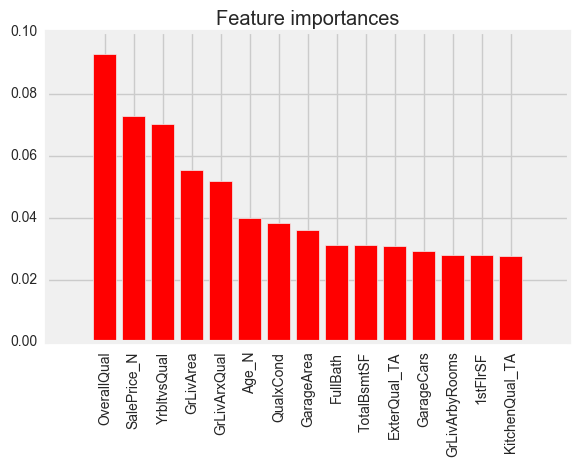

In [46]:
#feature importance plot
importances = rfr.feature_importances_

feature_importances = zip(importances, df_X_train.columns)
sorted_feature_importances = sorted(feature_importances, reverse = True)
top_15_predictors = sorted_feature_importances[0:15]

values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print predictors

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

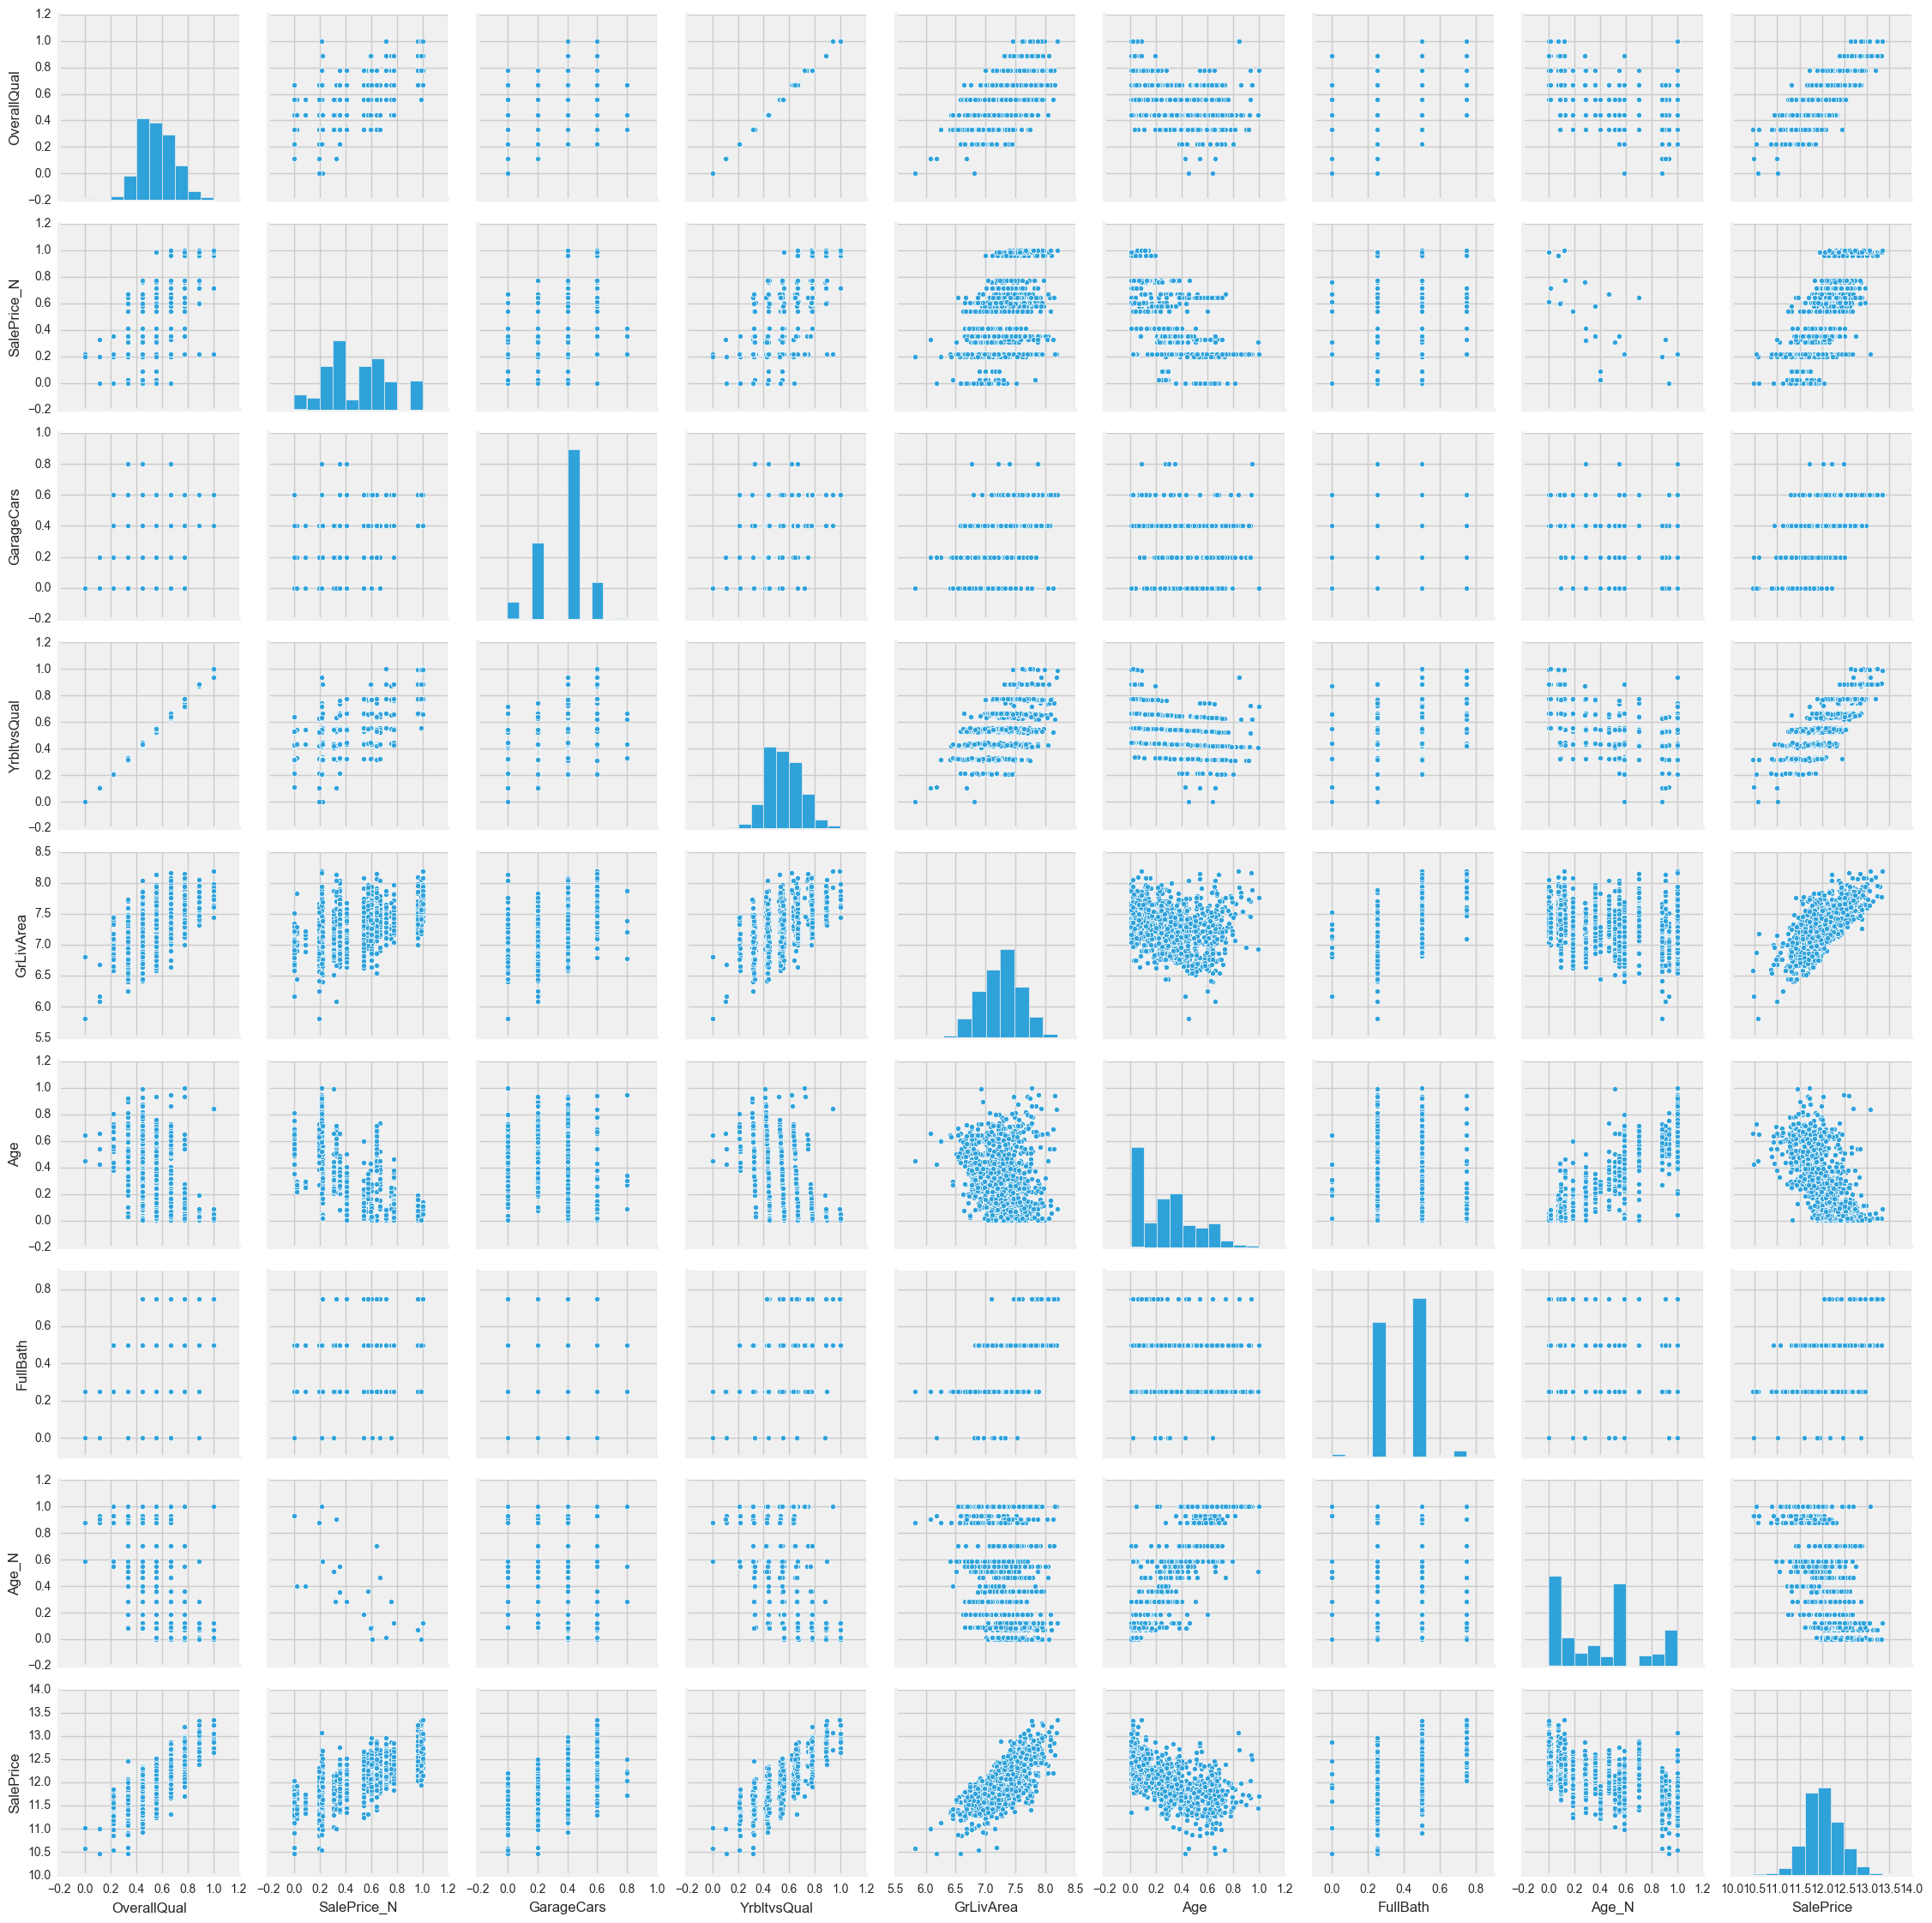

In [114]:
sns.pairplot(data = df_train_v2, vars = ['OverallQual', 'SalePrice_N', 'GarageCars', 'YrbltvsQual', 'GrLivArea', 'Age', 'FullBath', 'Age_N', 'SalePrice'])

### XGBoost

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [48]:
XGB = XGBRegressor()
learning_rate = [.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(XGB, param_grid, scoring='r2', n_jobs= 1, cv=kfold)
grid_result = grid_search.fit(df_X_train, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/DanielCervoni/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best: 0.903421 using {'learning_rate': 0.1}


In [49]:
xg_predictions = grid_result.predict(X_test)
xg_sales_predictions = np.exp(xg_predictions)
xg_sales_predictions

array([ 123972.1015625,  162138.359375 ,  166044.625    , ...,
        158881.0625   ,  117318.2421875,  211801.921875 ], dtype=float32)

In [71]:
xg_sales_predictions_df = pd.DataFrame(xg_sales_predictions, columns=['SalePrice'])

In [72]:
xg_sales_predictions_df['Id'] = np.arange(1461, 2920)

In [73]:
xg_sales_predictions_df_cols = xg_sales_predictions_df.columns.tolist()
xg_sales_predictions_df_cols = [xg_sales_predictions_df_cols[1]] + [xg_sales_predictions_df_cols[0]]
xg_sales_predictions_df = xg_sales_predictions_df[xg_sales_predictions_df_cols]
xg_sales_predictions_df.head()

Id      SalePrice
0  1461  124379.234375
1  1462  161922.484375
2  1463  165543.734375
3  1464  184900.484375
4  1465  190305.578125

In [74]:
xg_sales_predictions_df.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_xgv1.csv')

## With PCA

In [50]:
pca = PCA(n_components=0.99)

pca.fit(df_X_train)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print 'Eigenvalues: {}'.format(pca.components_) #eigenvalues
print 'Explained Variance by each Principal Component: {}'.format(var1) #ratio of explained variance for each eigenvalue

Eigenvalues: [[ 0.00704935  0.01183136  0.07075948 ...,  0.02606061  0.03628127
   0.02507557]
 [-0.02483085 -0.02947242  0.00237188 ...,  0.00961224  0.01541336
   0.00660204]
 [ 0.02201826  0.01496287  0.01728037 ...,  0.02749797  0.02889665
   0.0165748 ]
 ..., 
 [-0.08217488 -0.22359345 -0.0845291  ...,  0.15868498 -0.00039812
   0.0065594 ]
 [-0.00196082  0.24269433  0.00761614 ..., -0.19388137 -0.04509721
   0.03922046]
 [ 0.05884794 -0.06143872 -0.0316175  ..., -0.06299094 -0.00414    -0.00503545]]
Explained Variance by each Principal Component: [ 15.97  22.76  27.45  30.9   33.92  36.82  39.28  41.63  43.83  45.87
  47.83  49.69  51.48  53.1   54.66  56.18  57.61  59.02  60.36  61.63
  62.85  64.02  65.14  66.18  67.22  68.23  69.19  70.12  71.02  71.88
  72.72  73.56  74.32  75.06  75.79  76.5   77.19  77.86  78.49  79.12
  79.7   80.27  80.81  81.35  81.88  82.4   82.91  83.39  83.86  84.3
  84.73  85.15  85.55  85.93  86.3   86.67  87.02  87.36  87.7   88.03
  88.35  88.66  

In [51]:
Z = pca.transform(df_X_train) 
print Z.shape

(1456, 146)


In [52]:
pca_lr = LinearRegression()

#fit optimal linear regression line on training data, this performs gradient descent under the hood
pca_lr.fit(Z, y)

#given our model and our fit, predict y_values using x_test set
#yr_hat = lr.predict(X1_test)
#lr.score(X1_test, y1_test)

#cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
pca_lr_cv = cross_val_score(pca_lr, Z, y, cv = 5, scoring= 'r2')

print pca_lr_cv
print pca_lr_cv.mean()

[ 0.91016022  0.90534801  0.89074561  0.90837288  0.89153554]
0.901232451669


In [53]:
rfr = RandomForestRegressor(n_estimators = 100, max_depth = 5, min_samples_leaf= 5, max_features = 'sqrt')

rfr.fit(Z, y)
scores = cross_val_score(rfr, Z, y, scoring = 'r2', cv = 8)

print scores

[ 0.51298552  0.42831452  0.46140213  0.45807872  0.50693511  0.44004212
  0.47102724  0.45647774]


In [54]:
XGB = XGBRegressor()
learning_rate = [.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search_pca = GridSearchCV(XGB, param_grid, scoring='neg_mean_squared_error', n_jobs= 1, cv=kfold)
grid_result_pca = grid_search_pca.fit(Z, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.903421 using {'learning_rate': 0.1}


In [55]:
pca_predictions = grid_result_pca.predict(X_test)
pca_predictions

array([ 12.09006023,  12.09664536,  12.13296509, ...,  12.09979439,
        12.08859921,  12.13699055], dtype=float32)

In [56]:
pca_sales_predictions = np.exp(pca_predictions)
pca_sales_predictions

array([ 178092.828125,  179269.46875 ,  185900.171875, ...,  179834.875   ,
        177832.828125,  186650.015625], dtype=float32)

In [57]:
sales_predictions_df_pca = pd.DataFrame(pca_sales_predictions, columns=['SalePrice'])
sales_predictions_df_pca['Id'] = np.arange(1461, 2920)

In [58]:
sales_predictions_df_cols_pca = sales_predictions_df_pca.columns.tolist()
sales_predictions_df_cols_pca = [sales_predictions_df_cols_pca[1]] + [sales_predictions_df_cols_pca[0]]
sales_predictions_df_pca = sales_predictions_df_pca[sales_predictions_df_cols_pca]
sales_predictions_df_pca.head(20)

Id      SalePrice
0   1461  178092.828125
1   1462  179269.468750
2   1463  185900.171875
3   1464  183421.156250
4   1465  182821.281250
5   1466  189063.187500
6   1467  177473.640625
7   1468  198372.468750
8   1469  186244.250000
9   1470  178395.921875
10  1471  184903.125000
11  1472  188059.578125
12  1473  186607.296875
13  1474  184912.828125
14  1475  195303.328125
15  1476  195702.328125
16  1477  185570.531250
17  1478  187939.093750
18  1479  182023.453125
19  1480  198510.250000

In [54]:
sales_predictions_df_pca.to_csv(path_or_buf = '/Users/DanielCervoni/Desktop/housing_price_sales_predictions_pca.csv')